# Agenda: Plotting

1. Visualization (in general, and in Python)
2. Plotting with a series
    - Line plots
    - Bar plots (two types)
    - Pie charts (aka pie plots)
    - Box plots
    - Histograms
3. Plotting with data frames
    - How is plotting with a data frame similar to (and different from) plotting on a series?
    - Line plots
    - Bar plots
    - Pie charts
    - Box plots
    - Histograms
4. Scatter plots

Matplotlib is the biggest and best known package for plotting. Pandas provides us with a simple interface to use Matplotlib, giving us most (or even all) of the power, without having to wade through many method calls and obscure options.

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [2]:
np.random.seed(0)
s = Series(np.random.randint(0, 100, 10),
           index=list('abcdefghij'))

s

a    44
b    47
c    64
d    67
e    67
f     9
g    83
h    21
i    36
j    87
dtype: int64

<Axes: >

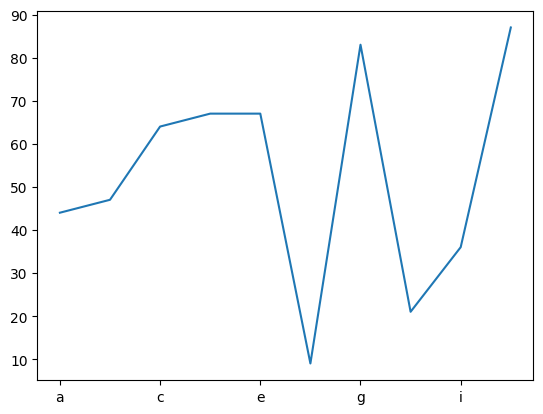

In [3]:
# if I want to plot this data, I can use the Pandas "plot" method.
# If I don't specify anything more, I'll get a line plot

s.plot()

# Plotting notes

- The x axis in the plot is taken from the index in the series
- The y axis in the plot is decided on automatically based on the min/max data values in the series
- The index isn't all shown; only every other index value is

<Axes: >

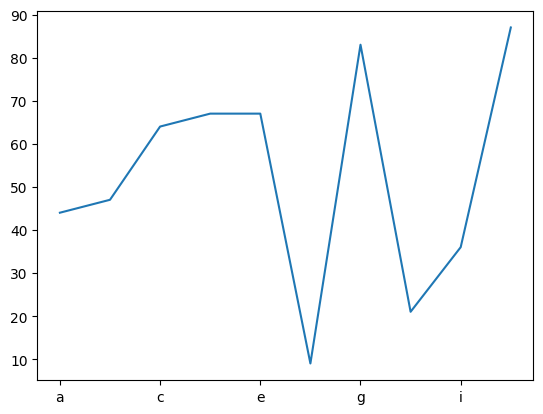

In [4]:
# a better way to create a line plot is to be more explicit
# I can just say

s.plot.line() 

Because Pandas is giving us an interface to the Matplotlib library, we can pass a *lot* of different Matplotlib options to these methods, and they'll be passed along.

<Axes: title={'center': 'The plot thickens'}>

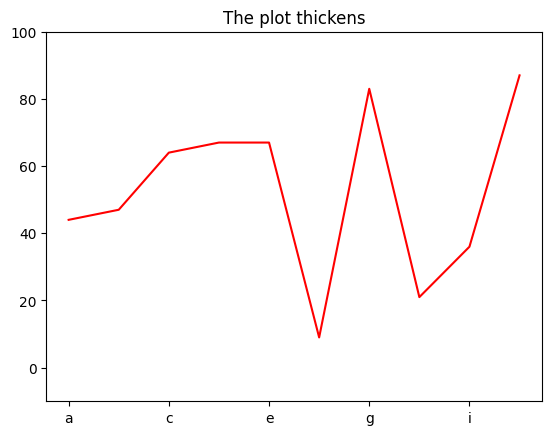

In [6]:
s.plot.line(title='The plot thickens',
            color='red', 
            ylim=(-10, 100) )

<Axes: >

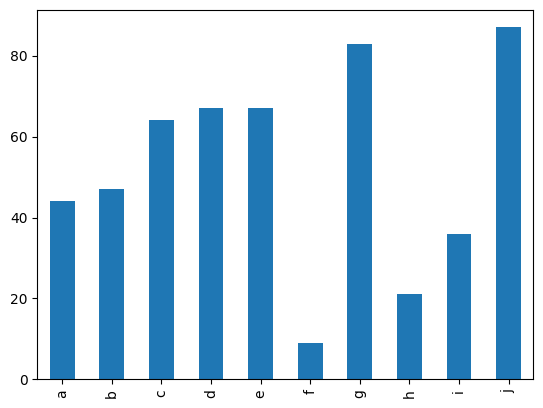

In [7]:
# given the same data, we can also produce a bar plot
# in that case, we will get one (vertical) bar for every data point, i.e., for each index in the series

s.plot.bar()

<Axes: >

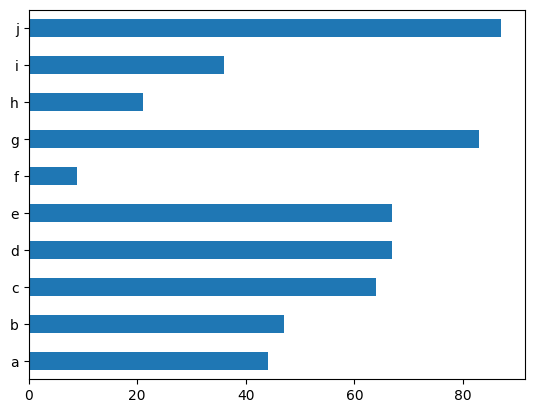

In [8]:
# we can also have horizontal bars

s.plot.barh()

<Axes: >

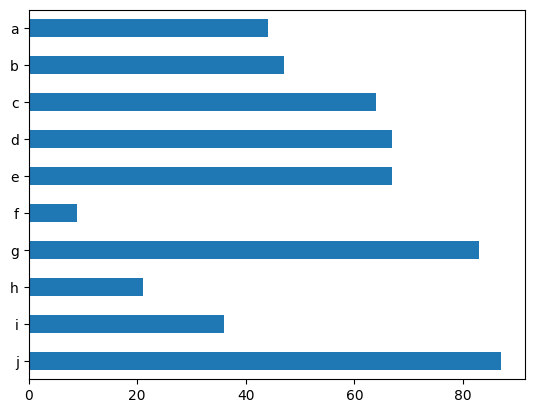

In [9]:
s.sort_index(ascending=False).plot.barh()

# Exercise: Plotting temperature

1. Define a series with 10 integers, representing the forecast high temp for the next 10 days. The index should contains strings in `MMDD` format.
2. Create a line plot from that data (get the forecast from a Web site). Set the y limits to be lower and higher than the temperature would normally be. What happens if the limits would cut off the values in the plot?
3. Create a bar plot with that data, setting both the title and color.

In [10]:
high_temps = Series([34, 33, 33, 34, 35, 35, 35, 34, 33, 34],
                    index='0809 0810 0811 0812 0813 0814 0815 0816 0817 0818'.split())
high_temps

0809    34
0810    33
0811    33
0812    34
0813    35
0814    35
0815    35
0816    34
0817    33
0818    34
dtype: int64

<Axes: title={'center': 'Expected high temps in Modiin'}>

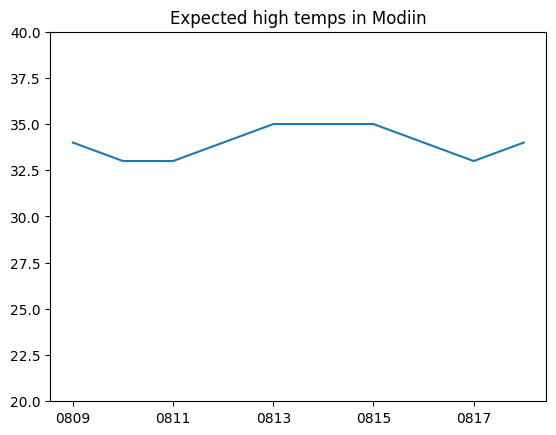

In [13]:
high_temps.plot.line(title='Expected high temps in Modiin',
                    ylim=(20, 40) )

<Axes: title={'center': 'High temps'}>

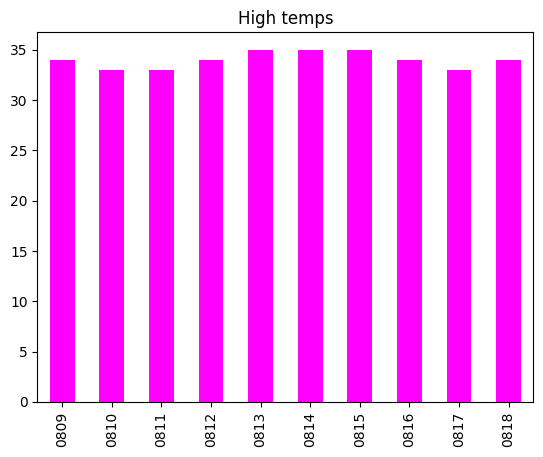

In [17]:
high_temps.plot.bar(title='High temps',
                   color='#ff00ff')    # red, green, blue, each from 0-255, expressed as 00-FF

# Pie charts

When we invoked `.plot.pie`, Pandas (a) sums all of the values and (b) produces a pie chart in which each element's proportion of that is shown.

<Axes: >

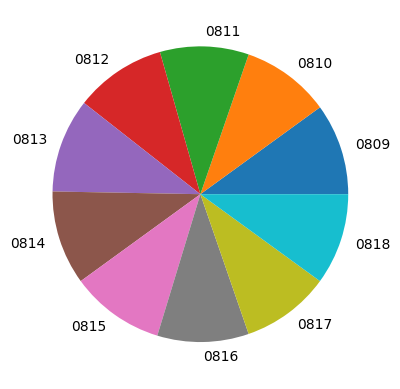

In [18]:
high_temps.plot.pie()

In [19]:
# we'll often want to first use value_counts, getting a series that shows how often each value is in the original series,
# and then run .plot.pie on that result

high_temps.value_counts()

34    4
33    3
35    3
Name: count, dtype: int64

<Axes: ylabel='count'>

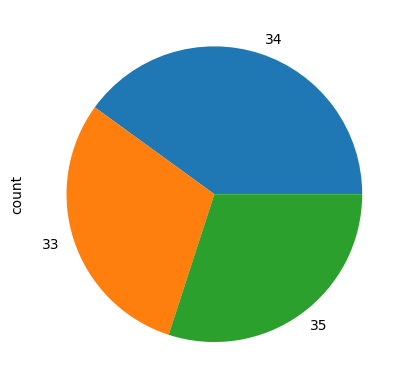

In [20]:
high_temps.value_counts().plot.pie()

<Axes: >

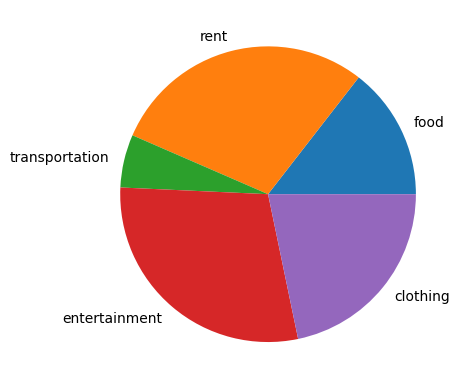

In [21]:
budget = Series([50, 100, 20, 100, 75],
        index=['food', 'rent', 'transportation', 'entertainment', 'clothing'])
budget.plot.pie()

<Axes: ylabel='Frequency'>

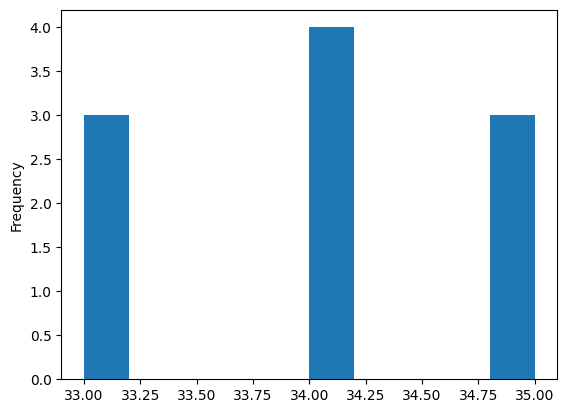

In [22]:
# another way to see the distribution of values is with a histogram
# we'll give our values, and Python will find the min/max values, and divide that range into
# 10 "bins". Then it'll plot a bar for each bin, with the bar being higher with more values in that bin

high_temps.plot.hist()

<Axes: ylabel='Frequency'>

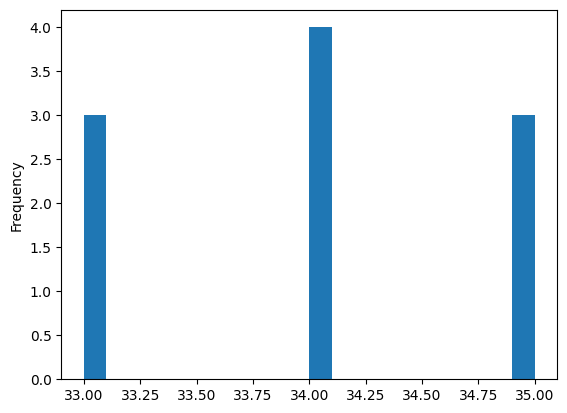

In [23]:
# we can pass bins=n, where n is the number of bins we really want.

high_temps.plot.hist(bins=20)

<Axes: ylabel='Frequency'>

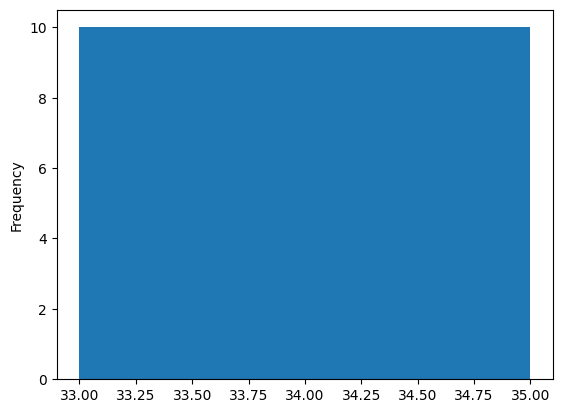

In [24]:
high_temps.plot.hist(bins=1)

<Axes: ylabel='Frequency'>

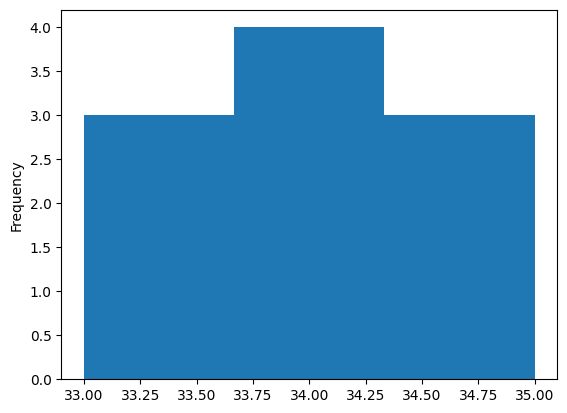

In [25]:
high_temps.plot.hist(bins=3)

# Exercise: Taxi plotting

1. Load `'../data/nyc_taxi_2020-07.csv'` into a data frame.
2. Create a pie plot showing the distribution of `passenger_count`.
3. Create a new column, `trip_length_category`, in which the values are either `short` (for <= 1 mile), `long` (for >= 10 miles), or `medium` (in the middle). Then create a pie plot showing the distribution of such things.
4. Create a histogram of the amounts that people paid.

In [26]:
df = pd.read_csv('../data/nyc_taxi_2020-07.csv',
                usecols=['passenger_count', 'total_amount', 'trip_distance'])
df

,passenger_count,trip_distance,total_amount
0,1.0,1.50,9.30
1,1.0,9.50,27.80
2,1.0,5.85,22.30
3,1.0,1.90,14.16
4,1.0,1.25,7.80
...,...,...,...
800407,NaN,24.23,83.50
800408,NaN,4.40,19.78
800409,NaN,8.78,38.45
800410,NaN,6.50,29.77


In [27]:
df.dtypes

passenger_count    float64
trip_distance      float64
total_amount       float64
dtype: object

In [28]:
df['passenger_count'].value_counts()

passenger_count
1.0    566009
2.0     90900
3.0     21778
0.0     19506
5.0     17107
6.0     14447
4.0      7810
7.0         5
8.0         2
9.0         1
Name: count, dtype: int64

<Axes: ylabel='count'>

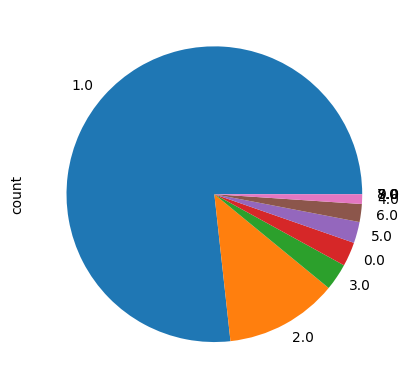

In [29]:
df['passenger_count'].value_counts().plot.pie()

In [30]:
# Create a new column, trip_length_category, in which the values are either short (for <= 1 mile), long (for >= 10 miles), 
# or medium (in the middle). Then create a pie plot showing the distribution of such things.

df['trip_length_category'] = 'medium'

In [34]:
df.loc[
    df['trip_distance'] <= 1   # row selector
    ,
    'trip_length_category'    # column selector
] = 'short'

df.loc[
    df['trip_distance'] >= 10   # row selector
    ,
    'trip_length_category'    # column selector
] = 'long'



In [35]:
df.head(20)

,passenger_count,trip_distance,total_amount,trip_length_category
0,1.0,1.50,9.30,medium
1,1.0,9.50,27.80,medium
2,1.0,5.85,22.30,medium
3,1.0,1.90,14.16,medium
4,1.0,1.25,7.80,medium
5,1.0,9.70,33.80,medium
6,1.0,5.27,26.39,medium
7,1.0,1.32,8.80,medium
8,1.0,0.73,10.12,short
9,1.0,18.65,66.36,long


<Axes: ylabel='count'>

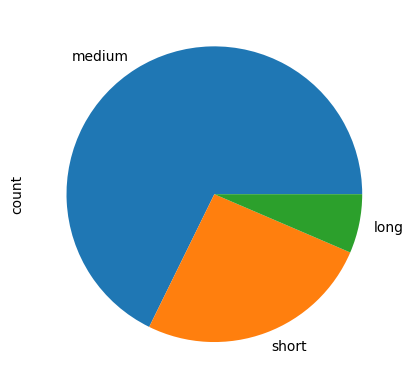

In [37]:
# to turn a numeric series into a categorical one, we can use pd.cut

pd.cut(df['trip_distance'],
       bins=[-10, 1, 10, 100000],
       labels=['short', 'medium', 'long']).value_counts().plot.pie()

<Axes: ylabel='Frequency'>

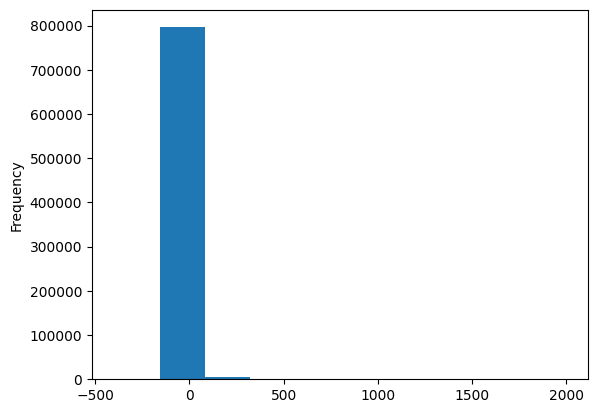

In [38]:
# histogram of how much people paid

df['total_amount'].plot.hist()

In [39]:
df['total_amount'].describe()

count    800412.000000
mean         18.631460
std          15.060771
min        -397.600000
25%          10.800000
50%          14.160000
75%          20.550000
max        1995.000000
Name: total_amount, dtype: float64

# Box plot (aka a box-and-whisker plot)

A box plot is the visual version of the `describe` method. It tries to give us a snapshot/picture of our data, so that we can reason about it. It, like the five-figure summary (min, 25%, median, 50%, max) was invented by John Tukey. 

To Tukey, the median was most representative of the data, as was the IQR (inter-quartile range), which we can calculate by subtracting 75% quartile - 25% quartile.

<Axes: >

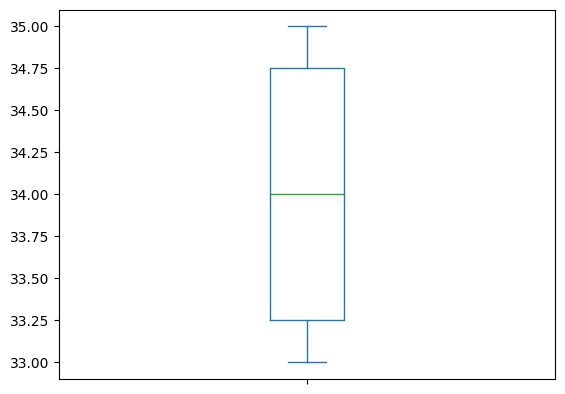

In [40]:
high_temps.plot.box()


<Axes: >

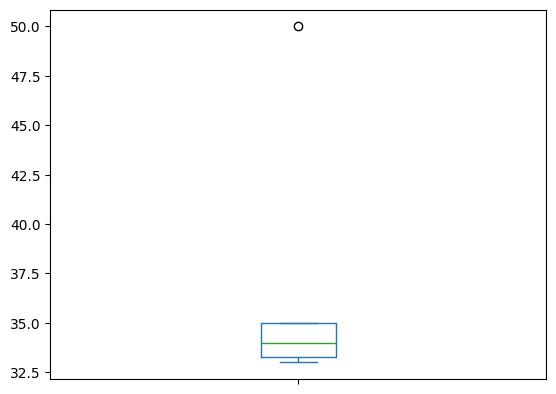

In [41]:
# let's make one temp very high

high_temps.loc['0812'] = 50
high_temps.plot.box()

If a value is more than median + 2*IQR, then it's considered an "outlier" and is drawn as a circle.

# Data frames and plotting

Normally, in Pandas, any method we can run on a series can also be run on a data frame. This is also true for plotting. The difference is that we'll get one plot per column, and they'll all be put together, albeit with different line colors.

In [42]:
temps = DataFrame({'hi':[32, 33, 33, 33, 34, 34, 35, 34, 34, 34],
                   'lo':[23, 23, 24, 23, 23, 23, 23, 23, 23, 23]},
                   index='0809 0810 0811 0812 0813 0814 0815 0816 0817 0818'.split())
temps
      

,hi,lo
0809,32,23
0810,33,23
0811,33,24
0812,33,23
0813,34,23
0814,34,23
0815,35,23
0816,34,23
0817,34,23
0818,34,23


<Axes: >

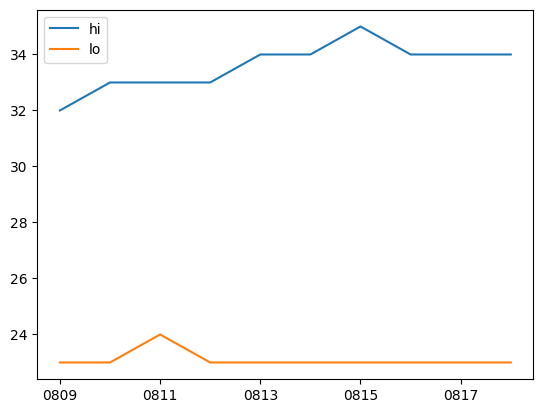

In [43]:
temps.plot.line()

<Axes: >

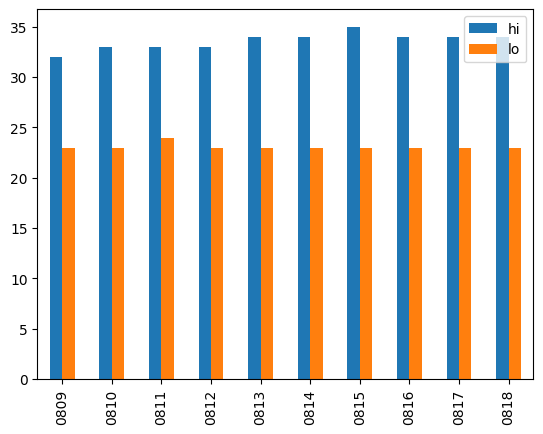

In [44]:
temps.plot.bar()

array([<Axes: >, <Axes: >], dtype=object)

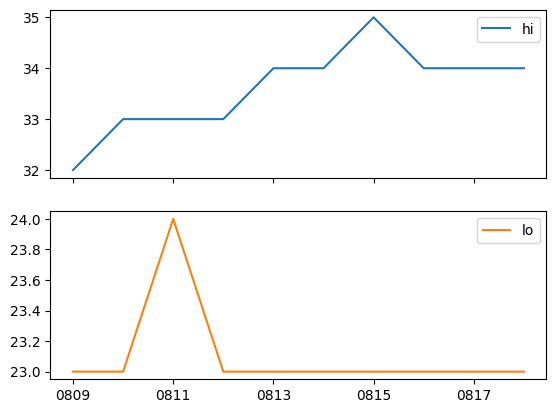

In [45]:
temps.plot.line(subplots=True)

<Axes: >

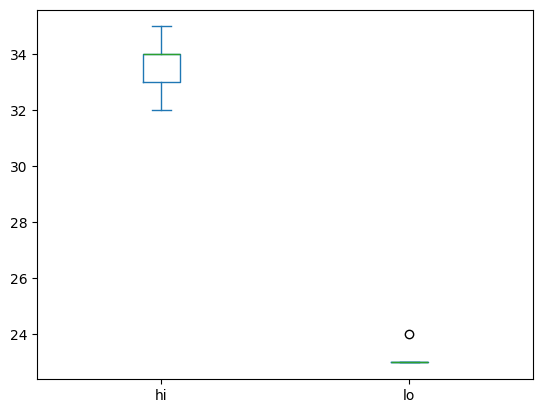

In [46]:
temps.plot.box()

hi       Axes(0.125,0.11;0.352273x0.77)
lo    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

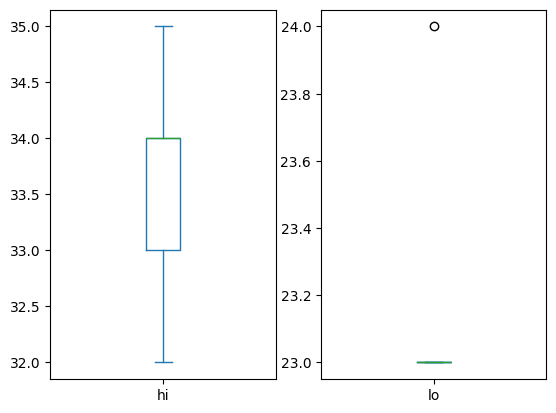

In [47]:
temps.plot.box(subplots=True)

In [48]:
# I'm going to pretend that if I add a "humidity" column, then I can combine high + humidity to give me a 
# misery index. 

temps['humidity'] = [80, 75, 50, 70, 82, 90, 82, 86, 81, 70]
temps

,hi,lo,humidity
0809,32,23,80
0810,33,23,75
0811,33,24,50
0812,33,23,70
0813,34,23,82
0814,34,23,90
0815,35,23,82
0816,34,23,86
0817,34,23,81
0818,34,23,70


<Axes: >

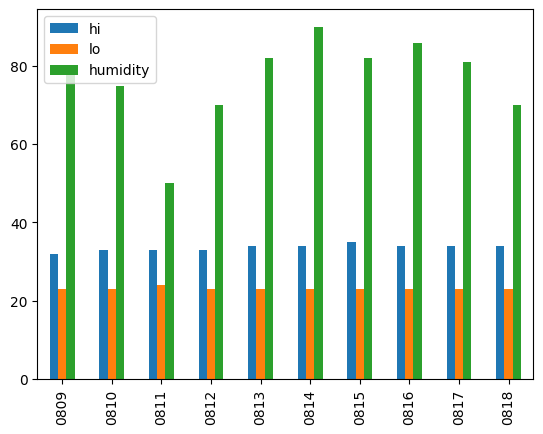

In [49]:
# can I plot all three columns together in a bar plot?
temps.plot.bar()

<Axes: >

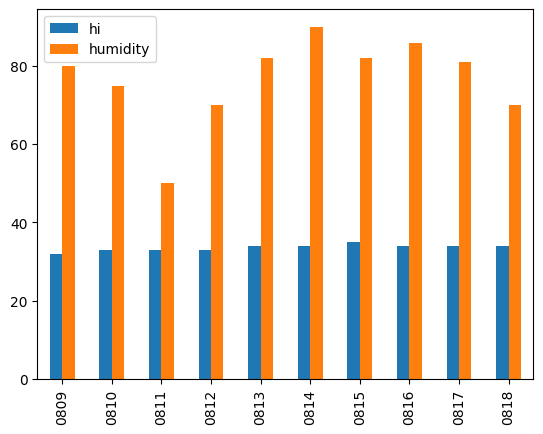

In [51]:
# can I restrict the output to only show for "hi" and "humidity"?

temps[['hi', 'humidity']].plot.bar()

<Axes: >

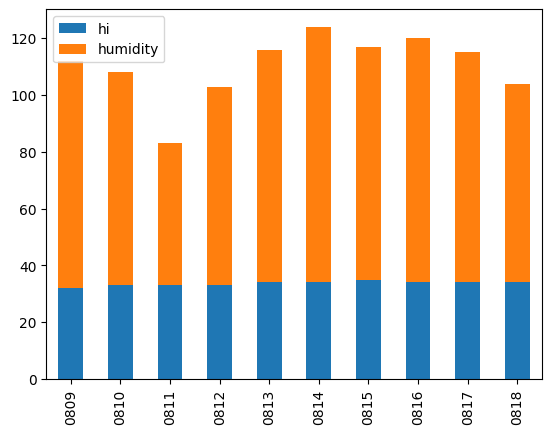

In [52]:
# I want to know how bad each day seems on the "misery index" I made up.
# We can use a stacked bar plot, where it combines each of a given x axis's
# values into a single bar

temps[['hi', 'humidity']].plot.bar(stacked=True)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

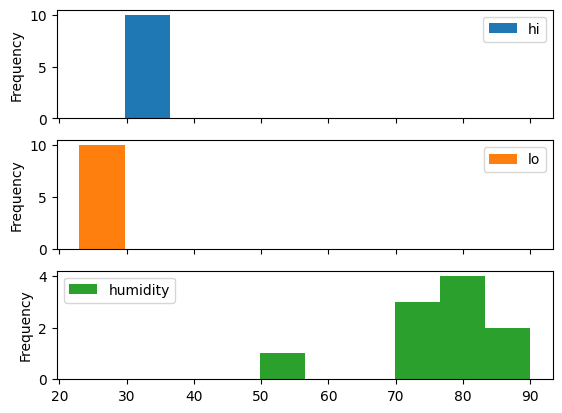

In [54]:
# can I do histograms?

temps.plot.hist(subplots=True)

# Exercises with taxi data

1. Show a histogram for `trip_distance` and `total_amount`. Try with and without subplots, to see what they look like.
2. Grab the first 200 rows from `trip_distance` and `total_amount`, and show a line plot with both of these on the same axes.
3. Create boxplots from `passenger_count`, `trip_distance`, and `total amount`. Would subplots help?
4. Grab the first 10 rows from the data frame, and create a stacked bar plot with all of the components that go into a taxi fare ('fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge' )

<Axes: ylabel='Frequency'>

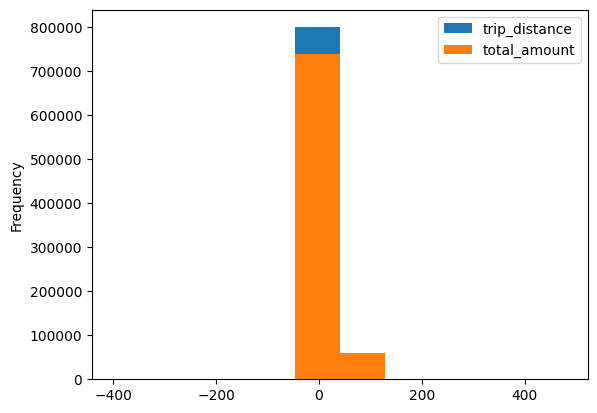

In [59]:
df.loc[
    ((df['total_amount'] < 500) & (df['trip_distance'] < 500)),   # row selector 
    ['trip_distance', 'total_amount']   # column selector
].plot.hist()

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

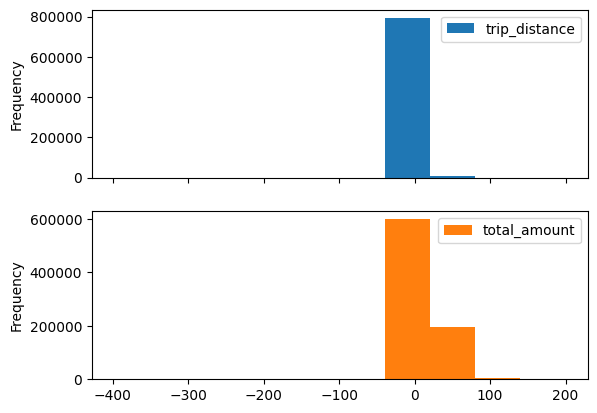

In [61]:
df.loc[
    ((df['total_amount'] < 200) & (df['trip_distance'] < 200)),   # row selector 
    ['trip_distance', 'total_amount']   # column selector
].plot.hist(subplots=True)

<Axes: >

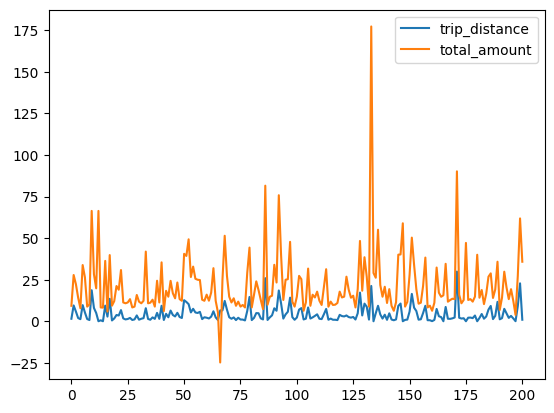

In [62]:
# Grab the first 200 rows from trip_distance and total_amount, and show a line plot with both of these on the same axes.

df.loc[
    :200,
    ['trip_distance', 'total_amount']
].plot.line()

passenger_count       Axes(0.125,0.11;0.227941x0.77)
trip_distance      Axes(0.398529,0.11;0.227941x0.77)
total_amount       Axes(0.672059,0.11;0.227941x0.77)
dtype: object

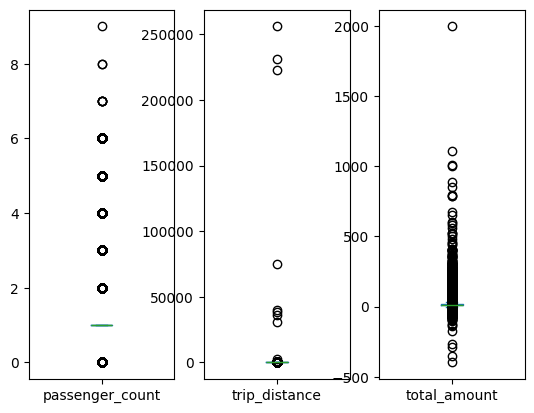

In [65]:
# Create boxplots from passenger_count, trip_distance, and total amount. Would subplots help?

df[['passenger_count', 'trip_distance', 'total_amount']].plot.box(subplots=True)

<Axes: >

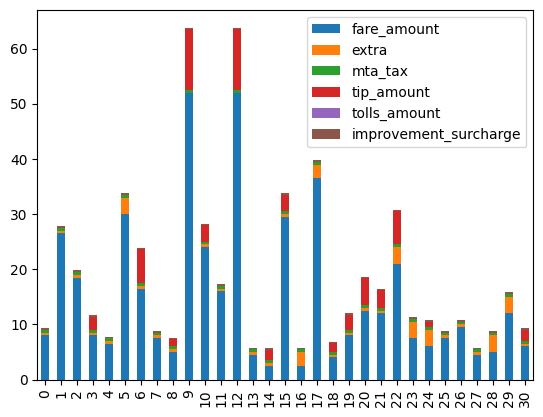

In [71]:
# Grab the first 10 rows from the data frame, and create a stacked bar plot with all of the components
# that go into a taxi fare ('fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge' )

df = pd.read_csv('../data/nyc_taxi_2020-07.csv',
                usecols=['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge'])

df.loc[
    :30
    ,
    ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']
].plot.bar(stacked=True)

In [72]:
# scatter plots
# these allow us to take any two numeric columns from a data frame, and plot them against one another

df = pd.read_csv('../data/nyc_taxi_2020-07.csv',
                usecols=['passenger_count', 'total_amount', 'trip_distance',
                         'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge'])


<Axes: xlabel='total_amount', ylabel='trip_distance'>

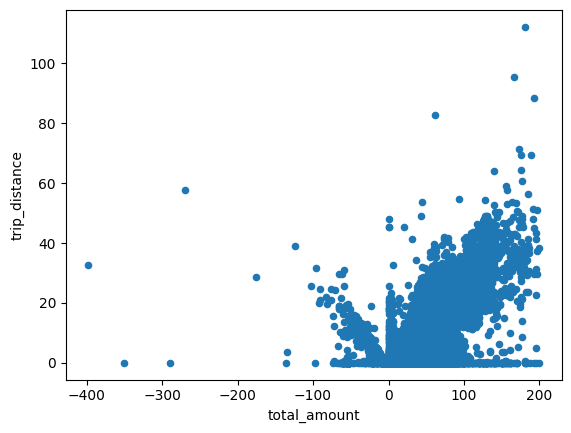

In [74]:
df.loc[
    ((df['total_amount'] < 200) & (df['trip_distance'] < 200)),   # row selector 
    ['trip_distance', 'total_amount']   # column selector
].plot.scatter(x='total_amount', y='trip_distance')

In [75]:
df.loc[
    ((df['total_amount'] < 200) & (df['trip_distance'] < 200)),   # row selector 
    ['trip_distance', 'total_amount']   # column selector
].corr()

,trip_distance,total_amount
trip_distance,1.000000,0.875878
total_amount,0.875878,1.000000


<Axes: xlabel='total_amount', ylabel='trip_distance'>

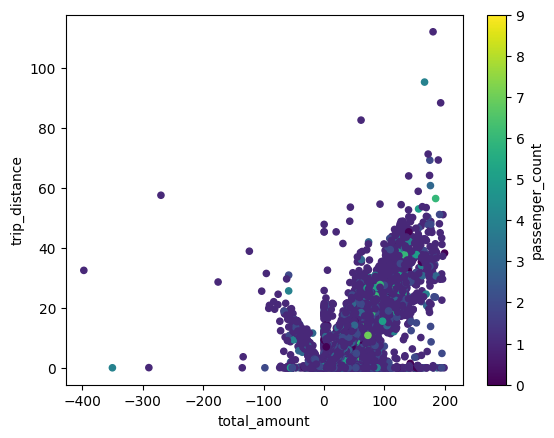

In [77]:
# let's add the number of passengers the color of our dots

df.loc[
    ((df['total_amount'] < 200) & (df['trip_distance'] < 200)),   # row selector 
    ['trip_distance', 'total_amount', 'passenger_count']   # column selector
].plot.scatter(x='total_amount', y='trip_distance', c='passenger_count')